In [109]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [110]:
df = pd.read_csv('/Users/racheldyap/Desktop/DataScienceFoundations/Session_3/2_titanic_dataset.csv')

def create_connection(database):
    try:
        conn = sqlite3.connect(database) # the connection object
        return conn 
    except Error as e:
        print(e)
    
    return None

database = '/Users/racheldyap/Desktop/DataScienceFoundations/Session_3/Titanic.db'
conn = create_connection(database)

query= 'SELECT * FROM passengers'
df=pd.read_sql_query(query,conn)
conn.close()
df.tail()

In [111]:
# Clean 'Name' column by separating titles in a new column

In [112]:
# define a function get_title to extract titles from the Name

In [113]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\. ', name)
    if title_search:
        return title_search.group(1)
    return ""

# create a new column named 'Title' where you store the extracted titles (Mr., Mrs. etc
df['Title']=df['Name'].apply(get_title)

In [114]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

#### replacing data

In [115]:
df['Title']=df['Title'].replace('Mlle','Miss')
df['Title']=df['Title'].replace('Ms','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')

In [116]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], dtype=object)

#### mapping age range

In [117]:
df['Age'] = df['Age'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

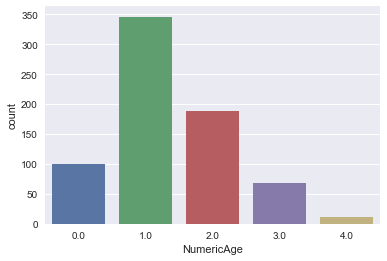

In [52]:
sns.countplot(df['NumericAge'])

In [118]:
df['CategoricalAge']=pd.cut(df['Age'],5)

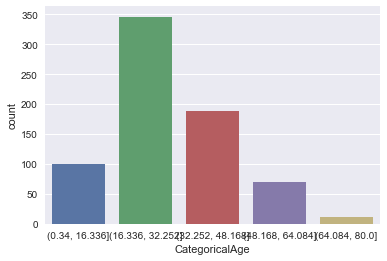

In [119]:
sns.countplot(df['CategoricalAge'])

In [120]:
df.CategoricalAge.head()

0    (16.336, 32.252]
1    (32.252, 48.168]
2    (16.336, 32.252]
3    (32.252, 48.168]
4    (32.252, 48.168]
Name: CategoricalAge, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [143]:
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

df['Person'] = df[['Age', 'Sex']].apply(get_person, axis=1)

In [144]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
title_mapping= {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [148]:
group = df[["Person","Survived"]].groupby(['Person'],as_index=False).mean()

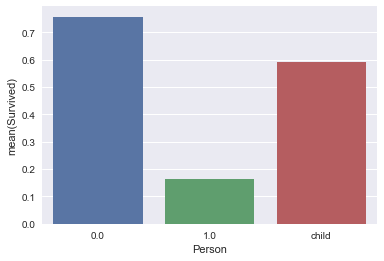

In [149]:
sns.barplot(x='Person', y='Survived', data=group)

In [150]:
df.groupby(df.index_col).agg({'Age':'mean','Survived':'sum'})[['Age','Survived']].reset_index()

AttributeError: 'DataFrame' object has no attribute 'index_col'